In [1]:
import os
os.chdir('..')

In [2]:
import torch
import pickle
import numpy as np

from gnn_library.util import load
from evaluate import evaluate_model
from instance_generator import sample_instances
from params import *
from util import _plot_approx_ratios_all

%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

GNN, args = load('GNN_exp_diff_15_9', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:2


## Size generalization experiment

#### Evaluate CRs for all graph configurations across different graph sizes

In [4]:
from params import EXPERIMENT_SIZE_GENERALIZATION_REGIMES

rng = np.random.default_rng(seed=0)
# num_trials = 150
num_trials = 30
batch_size = 500
# graph_configs = ALL_TESTING_GRAPH_CONFIGS
graph_configs = MAIN_TESTING_GRAPH_CONFIGS

node_configs = EXPERIMENT_SIZE_GENERALIZATION_REGIMES
sizes = [x+y for (x,y) in node_configs]
baselines_kwargs = {
    'greedy': {},
    'greedy_t': {'threshold': 0.35},
    'lp_rounding': {},
    'naor_lp_rounding': {}
}

data = [[] for _ in range(len(graph_configs))]

##### REMOVE #####
# graph_configs = MAIN_TESTING_GRAPH_CONFIGS[2:]

# with open(f"experiments/transferability_gnn2.pickle", 'rb') as handle:
#     data = pickle.load(handle)
#####  END   #####



# for data_index, graph_config in enumerate(graph_configs):
#     for i, node_config in enumerate(node_configs):
#         print(node_config, graph_config)
        
#         instances = sample_instances(
#             *node_config,
#             num_trials,
#             rng,
#             args.__dict__,
#             **graph_config
#         )

#         cr_ratios, _ = evaluate_model(
#             meta_model=None,
#             meta_model_type=None,
#             base_models=[GNN],
#             instances=instances,
#             batch_size=batch_size,
#             rng=rng,
#             num_realizations=5,
#             # baselines=['greedy', 'greedy_t', 'lp_rounding', 'naor_lp_rounding'],
#             baselines=[],
#             **baselines_kwargs
#         )

#         data[data_index].append(cr_ratios)
    

#         with open(f"experiments/transferability_gnn2_4.pickle", 'wb') as handle:
#             pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
#         with torch.no_grad():
#             torch.cuda.empty_cache()

#### Generate size generalization plots

IndexError: list index out of range

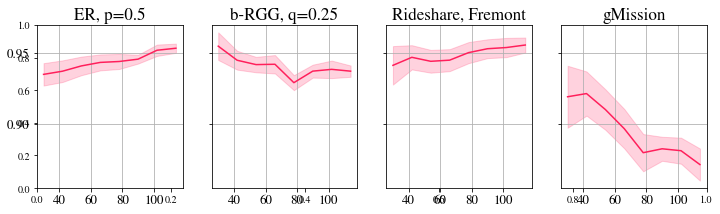

In [5]:
from util import _plot_approx_ratios

with open(f"experiments/transferability_gnn2_4.pickle", 'rb') as handle:
    results = pickle.load(handle)

filtered_results = {frozenset(g.items()): data for g, data in zip(graph_configs, results)}
_plot_approx_ratios(sizes, filtered_results, x_axis_name= "Total number of nodes $N$", confidence = 0.95)